In [ ]:
# gerardo Herrera... svm (kernel radial "poly") con 28k instacias de normal y recovering y 24 sensores

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [ ]:
#sensor77 = pd.read_csv('../input/vombas/sensor_procesado.csv')
#sensor77 = pd.read_csv('../input/vombas-28955-balanced-25sensor/sensor2-ordenado_status_sin_broken_balanced_28955.csv')
#sensor77 = pd.read_csv('../input/bombas-sensores-conocidos/sensor2.csv')
#sensor77 = pd.read_csv('../input/10ks25/s25balanced10k.csv')
#sensor77 = pd.read_csv('../input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv')
sensor77 = pd.read_csv('/content/drive/My Drive/datasets/sensor2-ordenado_status_sin_broken_balanced_28k.csv')

In [ ]:
cleanup_nums = {"machine_status":     {"NORMAL": 0, "RECOVERING": 1,"BROKEN": 2}}

In [ ]:
sensor77.replace(cleanup_nums, inplace=True)

In [ ]:
print(sensor77.shape)
sensor77.head()

(28002, 27)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,788.4987,701.3889,924.9999,43.69213,NaN,177.9514,0
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,804.1240,682.8704,965.6249,44.56018,NaN,178.5301,0
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,48.17723,420848.0000,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,740.8031,849.8997,454.2390,790.8016,690.7407,898.4374,46.00694,NaN,177662.0000,0
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628125.0000,48.65607,420.7494,462898.0000,460.8858,2.509521,666.0114,399.1046,878.8917,499043.0000,977752.0000,739.2722,847.7579,474.8731,792.8791,686.1111,956.2499,47.74306,NaN,175.0579,0
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,49.06298,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,737.6033,846.9182,408.8159,786064.0000,693.0555,935.9374,49.18982,NaN,173.3218,0


In [ ]:
sensor77.isnull()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# sensor77.dropna()
# sensor77.fillna(0, inplace=True)
sensor77.fillna(sensor77.mean(), inplace=True)


In [ ]:
print(sensor77.shape)
sensor77.head()

(28002, 27)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,788.4987,701.3889,924.9999,43.69213,481.174107,177.9514,0
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,804.1240,682.8704,965.6249,44.56018,481.174107,178.5301,0
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,48.17723,420848.0000,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,740.8031,849.8997,454.2390,790.8016,690.7407,898.4374,46.00694,481.174107,177662.0000,0
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628125.0000,48.65607,420.7494,462898.0000,460.8858,2.509521,666.0114,399.1046,878.8917,499043.0000,977752.0000,739.2722,847.7579,474.8731,792.8791,686.1111,956.2499,47.74306,481.174107,175.0579,0
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,49.06298,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,737.6033,846.9182,408.8159,786064.0000,693.0555,935.9374,49.18982,481.174107,173.3218,0


In [ ]:
is_NaN = sensor77.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = sensor77[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [Unnamed: 0, timestamp, sensor_00, sensor_01, sensor_02, sensor_03, sensor_04, sensor_11, sensor_14, sensor_16, sensor_17, sensor_18, sensor_19, sensor_20, sensor_21, sensor_22, sensor_23, sensor_25, sensor_26, sensor_27, sensor_28, sensor_30, sensor_31, sensor_44, sensor_50, sensor_51, machine_status]
Index: []


In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
sensor77.isnull().sum()

Unnamed: 0        0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_11         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_30         0
sensor_31         0
sensor_44         0
sensor_50         0
sensor_51         0
machine_status    0
dtype: int64

In [ ]:
#sensor77.drop('sensor_15', axis=1, inplace=True);
#sensor77.drop('sensor_15', axis=1, inplace=True)


In [ ]:
#sensor77.drop('sensor_05', axis=1, inplace=True);sensor77.drop('sensor_06', axis=1, inplace=True)

In [ ]:
#sensor77.drop('sensor_07', axis=1, inplace=True);sensor77.drop('sensor_08', axis=1, inplace=True)

In [ ]:
#sensor77.drop('sensor_09', axis=1, inplace=True);sensor77.drop('sensor_10', axis=1, inplace=True)

In [ ]:
#sensor77.drop('sensor_12', axis=1, inplace=True);sensor77.drop('sensor_13', axis=1, inplace=True)

In [ ]:
#sensor77.drop('timestamp', axis=1, inplace=True)

In [ ]:
#sensor77.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
print(sensor77.shape)
sensor77.head()

(28002, 27)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,788.4987,701.3889,924.9999,43.69213,481.174107,177.9514,0
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,804.1240,682.8704,965.6249,44.56018,481.174107,178.5301,0
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,48.17723,420848.0000,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,740.8031,849.8997,454.2390,790.8016,690.7407,898.4374,46.00694,481.174107,177662.0000,0
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628125.0000,48.65607,420.7494,462898.0000,460.8858,2.509521,666.0114,399.1046,878.8917,499043.0000,977752.0000,739.2722,847.7579,474.8731,792.8791,686.1111,956.2499,47.74306,481.174107,175.0579,0
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,49.06298,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,737.6033,846.9182,408.8159,786064.0000,693.0555,935.9374,49.18982,481.174107,173.3218,0


In [ ]:
import time

In [ ]:
X=sensor77[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03','sensor_04', 'sensor_11', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20','sensor_21', 'sensor_22', 'sensor_23', 'sensor_25', 'sensor_26','sensor_27', 'sensor_28', 'sensor_30', 'sensor_31', 'sensor_44','sensor_50', 'sensor_51']]  # Features
#y=sensor['target']  # Labels
y=sensor77['machine_status']  # Labels


In [ ]:
print(X.shape)
X.head()

(28002, 24)


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_11,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_25,sensor_26,sensor_27,sensor_28,sensor_30,sensor_31,sensor_44,sensor_50,sensor_51
0,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,788.4987,701.3889,924.9999,43.69213,481.174107,177.9514
1,2.465394,47.09201,53.2118,46.310760,634375.0000,47.52422,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,741.7151,848.0708,429.0377,804.1240,682.8704,965.6249,44.56018,481.174107,178.5301
2,2.444734,47.35243,53.2118,46.397570,638.8889,48.17723,420848.0000,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,740.8031,849.8997,454.2390,790.8016,690.7407,898.4374,46.00694,481.174107,177662.0000
3,2.460474,47.09201,53.1684,46.397568,628125.0000,48.65607,420.7494,462898.0000,460.8858,2.509521,666.0114,399.1046,878.8917,499043.0000,977752.0000,739.2722,847.7579,474.8731,792.8791,686.1111,956.2499,47.74306,481.174107,175.0579
4,2.445718,47.13541,53.2118,46.397568,636.4583,49.06298,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,737.6033,846.9182,408.8159,786064.0000,693.0555,935.9374,49.18982,481.174107,173.3218


In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



In [ ]:
# no coorrer
#import time


#X_train=X
#start = time.time()
#X = sensor77.drop('machine_status', axis=1)
#y = sensor77['machine_status']

#from sklearn import preprocessing
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#from sklearn.preprocessing import MinMaxScaler
#scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
#X_train = scaling.transform(X_train)
#X_test = scaling.transform(X_test)

#!pip install sklearn.grid_search

#from sklearn.svm import SVR
#from sklearn.grid_search import GridSearchCV
#svclassifier = SVR(kernel='linear')
#svclassifier.fit(X_train, y_train)

#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(X_train, y_train)

#stop = time.time()
#print(f"Training time: {stop - start}s")

In [ ]:
start = time.time()
#X = sensor77.drop('machine_status', axis=1)
#y = sensor77['machine_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
#svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svclassifier = SVC(kernel='poly', degree=8)

svclassifier.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 46.65305781364441s


In [ ]:
y_pred = svclassifier.predict(X_test)

#Evaluacion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1552 1252]
 [ 220 2577]]
              precision    recall  f1-score   support

           0       0.88      0.55      0.68      2804
           1       0.67      0.92      0.78      2797

    accuracy                           0.74      5601
   macro avg       0.77      0.74      0.73      5601
weighted avg       0.77      0.74      0.73      5601



In [ ]:
# validacion cruzada

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
#from sklearn.model_selection import cross_val_score
# https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
#start3 = time.time()
from sklearn import svm
from sklearn.model_selection import cross_val_score
start3 = time.time()
#clf = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
clf = svm.SVC(kernel='poly', degree=8)
#scores = cross_val_score(clf, X, y, cv=5)
scores = cross_val_score(clf, X, y, cv=10)
scores
print(scores.mean())
stop3 = time.time()
print(f"CV Training time: {stop3 - start3}s")

0.7308073392155863
CV Training time: 491.53056931495667s


In [ ]:
#start3 = time.time()
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
start3 = time.time()
#clf = svm.SVC(kernel='rbf', random_state=0, gamma=.1, C=1)
clf = svm.SVC(kernel='poly', degree=8)
#scores = cross_val_score(clf, X, y, cv=5)
#scores = cross_val_score(clf, X, y, cv=10)
#cv = cross_val_score(clf, X, y, cv=10)

#cv = cross_validate(clf, X, y, cv=10)

cv1 = cross_validate(clf, X, y, cv=10,scoring ='accuracy')
#scores
#cv
#print(scores.mean())
#print(cv.mean())
#
f1=cross_validate(clf, X,y, cv=10, scoring ='f1')
recall_score=cross_validate(clf, X,y, cv=10, scoring ='recall')
pre_score=cross_validate(clf, X,y, cv=10, scoring ='precision_macro')
print(confusion_matrix(y_test,y_pred))
print(f"precision_macro_score:")
print(pre_score['test_score'])
print(pre_score['test_score'].mean())
#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())
#
print(f"accu:")
print(cv1['test_score'])
print(cv1['test_score'].mean())
#
print(f"recall:")
print(recall_score['test_score'])
print(recall_score['test_score'].mean())
print(f"f1score:")
print(f1['test_score'])
print(f1['test_score'].mean())
#
stop3 = time.time()
print(f"CV Training time: {stop3 - start3}s")

[[1552 1252]
 [ 220 2577]]
precision_macro_score:
[0.75208739 0.71308193 0.78386102 0.78510693 0.75843807 0.76749554
 0.78665029 0.7806068  0.75921383 0.82383324]
0.7710375031395585
accu:
[0.70581935 0.68868261 0.73892857 0.73464286 0.71392857 0.72392857
 0.73642857 0.73392857 0.71964286 0.81214286]
0.7308073392155863
recall:
[0.92       0.8579586  0.93785714 0.945      0.92142857 0.92571429
 0.94571429 0.93785714 0.915      0.90714286]
0.9213672886713573
f1score:
[0.75764706 0.73382173 0.78224605 0.78076129 0.76308784 0.77028232
 0.78204371 0.77899733 0.76546161 0.82844097]
0.7742789906393964
CV Training time: 1978.1140627861023s


In [ ]:
# print(scores[])
#print(scores.mean())
#stop3 = time.time()
#print(f"CV Training time: {stop3 - start3}s")

CV Training time: 586.2809367179871s


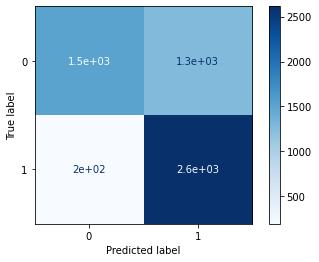

accuracy:
[0.70581935 0.68868261 0.73892857 0.73464286 0.71392857 0.72392857
 0.73642857 0.73392857 0.71964286 0.81214286]
0.7308073392155863
precision:
[0.644      0.64106667 0.67092489 0.66515837 0.65118627 0.65954198
 0.66666667 0.66615931 0.65793529 0.76230492]
0.6684944360713457
recall:
[0.92       0.8579586  0.93785714 0.945      0.92142857 0.92571429
 0.94571429 0.93785714 0.915      0.90714286]
0.9213672886713573
f1:
[0.75764706 0.73382173 0.78224605 0.78076129 0.76308784 0.77028232
 0.78204371 0.77899733 0.76546161 0.82844097]
0.7742789906393964
--------
matriz de confusion:
TN=1526, FP=1266 
FN=195, TP=2614 
--------
matriz de confusion %:
TN=27.245134797357615, FP=22.603106588109267 
FN=3.481521156936261, TP=46.670237457596855 
--------
accuracy1=0.7391537225495447
--------
reca1=0.9305802776788893
--------
pre1=0.6737113402061856
--------
f1score=0.7815817013006429


In [ ]:
#mejorado
#start3 = time.time()
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#para confu
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
#para confu

start3 = time.time()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
#clf = SVC(kernel='rbf', random_state=0, gamma=.1, C=1)
clf = svm.SVC(kernel='poly', degree=8)
clf.fit(X_train, y_train)

#scores=cross_validate(model, X,y, cv=10, scoring = ['accuracy','f1','recall','precision'],return_train_score=False)


#clf = svm.SVC(kernel='rbf', random_state=0, gamma=.1, C=1)

#GH
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#GH


#scores = cross_val_score(clf, X, y, cv=5)
#scores = cross_val_score(clf, X, y, cv=10)
#cv = cross_val_score(clf, X, y, cv=10)
#cv = cross_validate(clf, X, y, cv=10)
#cv1 = cross_validate(clf, X, y, cv=10,scoring ='accuracy')

scores = cross_validate(clf, X, y, cv=10,scoring =['accuracy','f1','recall','precision'],return_train_score=False)

#scores
#cv
#print(scores.mean())
#print(cv.mean())
#


#f1=cross_validate(clf, X,y, cv=10, scoring ='f1')
#recall_score=cross_validate(clf, X,y, cv=10, scoring ='recall')
#pre_score=cross_validate(clf, X,y, cv=10, scoring ='precision_macro')
#print(confusion_matrix(y_test,y_pred))
#print(f"precision_macro_score:")
#print(pre_score['test_score'])
#print(pre_score['test_score'].mean())
#print(f"test_score:")
#print(cv['test_score'])
#print(cv['test_score'].mean())
#
#print(f"accu:")
#print(cv1['test_score'])
#print(cv1['test_score'].mean())
#
#print(f"recall:")
#print(recall_score['test_score'])
#print(recall_score['test_score'].mean())
#print(f"f1score:")
#print(f1['test_score'])
#print(f1['test_score'].mean())
#
stop3 = time.time()
print(f"CV Training time: {stop3 - start3}s")

#mejora gh

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  

plt.show()

gh4 = scores.get("test_accuracy")

print(f"accuracy:")
print(gh4)
print(gh4.mean())

gh3 = scores.get("test_precision")

print(f"precision:")
print(gh3)
print(gh3.mean())

gh = scores.get("test_recall")

print(f"recall:")
print(gh)
print(gh.mean())

gh2 = scores.get("test_f1")

print(f"f1:")
print(gh2)
print(gh2.mean())

CM = confusion_matrix(y_test, y_pred)
print(f"--------")
print(f"matriz de confusion:")
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(f"TN={TN}, FP={FP} ")
print(f"FN={FN}, TP={TP} ")

print(f"--------")
print(f"matriz de confusion %:")
total1=(TN+TP+FN+FP)

print(f"TN={100*TN/total1}, FP={100*FP/total1} ")
print(f"FN={100*FN/total1}, TP={100*TP/total1} ")

print(f"--------")
acc1=(TN+TP)/(TN+TP+FN+FP)
print(f"accuracy1={acc1}")

print(f"--------")
re1=(TP)/(TP+FN)
print(f"reca1={re1}")

print(f"--------")
pre1=(TP)/(TP+FP)
print(f"pre1={pre1}")

print(f"--------")
f1s1=(2*pre1*re1)/(pre1+re1)
print(f"f1score={f1s1}")
